# Cognitive Algorithms - Assignment 3
Cognitive Algorithms      
Technische Universität Berlin     
Fachgebiet Maschinelles Lernen 
                    

**Answer the questions on Isis in 'Assignment 3 - Quiz' and copy code from this notebook where necessary.**

# Programming
---
*Please keep in mind, that we will deduct one point for each unnecessary loop.*            
Note that part 2 of this assignment consists of two tasks.

### Task 1: Ordinary Least Squares
In this assignment you will implement a linear regression and predict two dimensional hand positions from electromyographic (EMG) recordings obtained with high-density electrode arrays on the lower arm.  Download the data set ```myo_data.mat``` from the ISIS web site, if not done yet. 

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [6]:
%matplotlib inline
plt.style.use('ggplot')

In [7]:
def load_myo_data(fname):
    ''' Loads EMG data from <fname>                      
    '''
    # load the data
    data = loadmat(fname)
    # extract data and hand positions
    X = data['training_data']
    X = np.log(X)
    Y = data['training_labels']
    #Split data into training and test data
    X_train = X[:, :5000]
    X_test = X[:, 5000:]
    Y_train = Y[:, :5000]
    Y_test = Y[:, 5000:]
    return X_train, Y_train, X_test, Y_test

In [8]:
a=load_myo_data("myo_data.mat")
print(a[0].shape,a[1].shape,a[2].shape,a[3].shape)

(192, 5000) (2, 5000) (192, 5255) (2, 5255)


In [9]:
def train_ols(X_train, Y_train, llambda = 0):
    ''' Trains ordinary least squares (ols) regression
    Input:
    X_train - DxN array of N data points with D features
    Y
    - D2xN array of length N with D2 multiple labels
    llabmda - Regularization parameter
    Output:
    W
    - DxD2 array, linear mapping used to estimate labels
    with np.dot(W.T, X)
    '''
    # your code here
    W=(np.linalg.inv((X_train @ X_train.T)+llambda*np.identity(X_train.shape[0])))@X_train@Y_train.T
    return W

In [10]:
def apply_ols(W, X_test):
    ''' Applys ordinary least squares (ols) regression
        Input:
            X_test - DxN array of N data points with D features
            W      - DxD2 array, linear mapping used to estimate labels trained with train_ols
        Output:
            Y_test - D2xN array
    '''
    # your code here
    Y_test=W.T@X_test
    return Y_test

In [11]:
def predict_handposition():
    X_train, Y_train, X_test, Y_test = load_myo_data('myo_data.mat')
    # compute weight vector with linear regression
    W = train_ols(X_train, Y_train)
    # predict hand positions
    Y_hat_train = apply_ols(W, X_train)
    Y_hat_test = apply_ols(W, X_test) 
        
    plt.figure(figsize=(10, 8))
    
    plt.subplot(2, 2, 1)
    plt.plot(Y_train[0,:1000], Y_train[1,:1000],'.k', label = 'true')
    plt.plot(Y_hat_train[0,:1000], Y_hat_train[1,:1000],'.r', label = 'predicted')
    plt.title('Training Data')
    plt.xlabel('x position')
    plt.ylabel('y position')
    plt.legend(loc = 0)
    
    plt.subplot(2, 2, 2)
    plt.plot(Y_test[0,:1000], Y_test[1,:1000], '.k')
    plt.plot(Y_hat_test[0,:1000], Y_hat_test[1,:1000], '.r')
    plt.title('Test Data')
    plt.xlabel('x position')
    plt.ylabel('y position')
    
    plt.subplot(2, 2, 3)
    plt.plot(Y_train[1,:600], 'k', label = 'true')
    plt.plot(Y_hat_train[1,:600], 'r--', label = 'predicted')
    plt.xlabel('Time')
    plt.ylabel('y position')
    plt.legend(loc = 0)
    
    plt.subplot(2, 2, 4)
    plt.plot(Y_test[1,:600], 'k')
    plt.plot(Y_hat_test[1,:600], 'r--')
    plt.xlabel('Time')
    plt.ylabel('y position')

In [12]:
def test_assignment4():
    ##Example without noise
    x_train = np.array([[ 0,  0,  1 , 1], [ 0,  1,  0, 1]])
    y_train = np.array([[0, 1, 1, 2]])
    
    w_est = train_ols(x_train, y_train) 
    w_est_ridge = train_ols(x_train, y_train, llambda=1)
    
    assert np.allclose(w_est.T, [[1, 1]])
    assert np.allclose(w_est_ridge.T, [[.75, .75]])
    
    y_est = apply_ols(w_est, x_train)
    assert np.allclose(y_train, y_est)
    
    print('No-noise-case tests passed')
    
    ##Example with noise
    #Data generation
    w_true = 4
    X_train = np.arange(10)
    X_train = X_train[None,:]
    Y_train = w_true * X_train + np.random.normal(0,2,X_train.shape)
    
    #Regression 
    w_est = train_ols(X_train, Y_train) 
    Y_est = apply_ols(w_est, X_train)
    
    #Plot result
    plt.figure(figsize=(8, 6))
    plt.plot(X_train.T, Y_train.T, '+', label='Train Data')
    plt.plot(X_train.T, Y_est.T, label='Estimated regression')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(loc='lower right')

**A) (5 points)** Implement ordinary least squares regression (OLS) with an optional ridge parameter by completing the function stubs  ```train_ols``` and  ```apply_ols```. In ```train_ols```, you estimate a linear mapping $W$,    
$$W = (X_{\text{train}}X_{\text{train}}^{\top} + \lambda I)^{-1}X_{\text{train}}Y_{\text{train}}^{\top}$$       
that optimally predicts the training labels from the training data, $X_{\text{train}} \in \mathbb{R}^{D_X \times N_{tr}}$,  $Y_{\text{train}} \in\mathbb{R}^{D_Y \times N_{tr}}$. Here, $\lambda \in \mathbb R$ is the (optional) Ridge regularization parameter.  
The function ```apply_ols``` than uses the weight vector to predict the (unknown) hand positions of new test data $X_{\text{test}} \in\mathbb{R}^{D_X \times N_{te}}$     
$$Y_{\text{test}} = W^{\top}X_{\text{test}}$$         
The function  ```test_assignment4``` helps you to debug your code.

No-noise-case tests passed


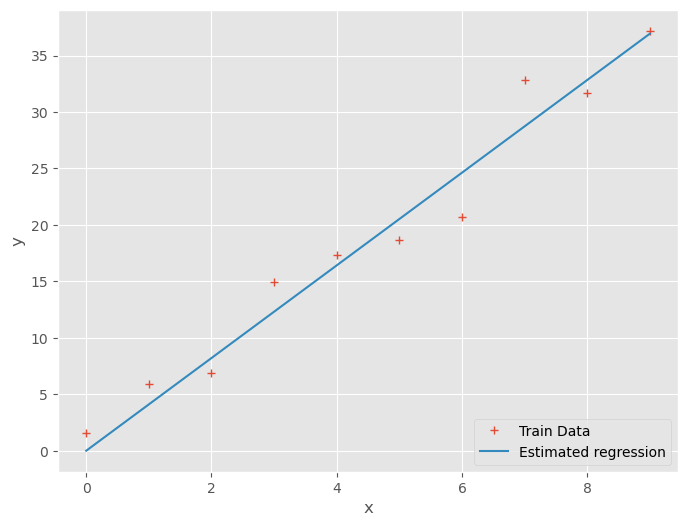

In [13]:
test_assignment4()

**B) (1 point)**  The data set ```myo_data.mat``` consists of preprocessed EMG data $X$ and 2-dimensional stimulus labels $Y$. Labels are x/y positions of the hand during different hand movements. The function  ```load_myo_data```  loads the data and splits it into train and test data. Familiarize yourself with the data by answering the following questions:         
How many time points $N_{tr}$ does the train set contain? How many time points $N_{te}$ does the test set contain? At each time point, at how many electrodes $D_X$ was the EMG collected? 

$N_{tr} = $

$N_{te} = $ 

$D_{X} = $                   

You can predict two dimensional hand positions by calling the function ```predict_handpositions```. It plots, for the train and the test data, the true hand position versus the estimated hand position. Familiarize yourself with the code and the meaning of the plots.

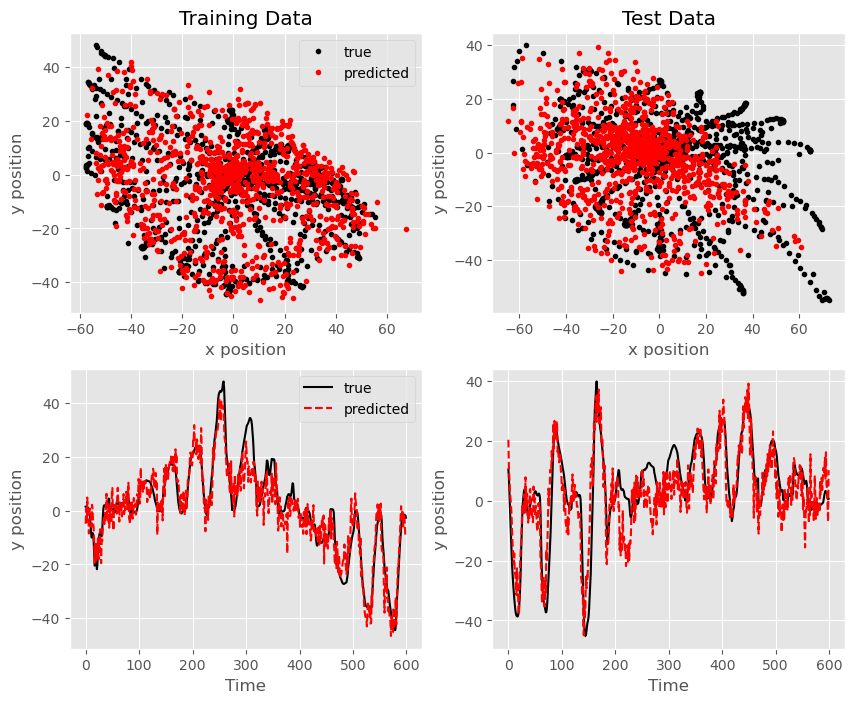

In [14]:
predict_handposition()

**C) (3 points)** Below true and predicted hand positions are visualized as plotted with the function ```predict_handposition()``` from the notebook when ```train_ols()``` and ```apply_ols()``` are correctly implemented. The first image shows results when the input data (muscle activations) are logarithmized  with X = np.log(X) before application of the regression.
![Figure_1](handpositionsLog.png)
For the second image, the input data has not been logarithmized before applying the regression algorithm.
![Figure_2](handpositionsNonlog.png)

Based on this images, please complete the following questions by selecting the missing words.

To judge the accuracy of a solution usually the performance on [training/test] data is analyzed. In the present case, better performance is achieved when the [non-logarithmized/logarithmized] input data is used.
The performance on the training data is [worse/better/equal] compared to the performance on the test data. When the original data shows a logarithmic behavior, applying a log transformation can be used to [smoothen/filter/linearize] the data.
If we cannot predict the labels 𝑌 perfectly by a linear regression on 𝑋, the relationship between 𝑋 and 𝑌 [cannot be linear/must be linear/must be non-linear/can be linear or non-linear/cannot be non-linear].

### Task 2: Polynomial Regression (12 points)
In Task 1 you implemented linear regression. You will see in this task, that aboves code can be used to obtain polynomial fits for data prediction.


**A) (2 points)**  To do so, first write a function  ``` create_trainmatrix``` which takes a data matrix containing the input vector $X$ and a polynomial degree M as inputs and returns a data matrix $Y$ that holds the polynomials of $X$. 

For example, for an input vector $X$ = [[ 0. 1. 2.]] and M = 3, the output should be:
            $Y$ = [[   1.    1.    1. ]
                 [   0.    1.    2. ]
                 [   0.    1.    4. ]
                 [   0.    1.    8. ]]

In [15]:
def create_trainmatrix(X, M):
    '''
    input:  X: matrix containing the input vector
            M: degree of polynomial
    output: Y: matrix containing the 0th to Mth polynomial of X, eg for X = [[ 0. 1. 2.]] and M = 3:
            Y = [[   1.    1.    1. ]
                 [   0.    1.    2. ]
                 [   0.    1.    4. ]
                 [   0.    1.    8. ]]
    '''
    # your code here
    #Y=np.ones((M+1,M+1))
    # Y[0]=X @ 1 
   
    Y=[]
    #Y.append([1] * X.shape[0])
    for i in range(M+1):
        Y.append(np.power(X[0],i).tolist())
    
    return np.array(Y)

In [16]:
create_trainmatrix([[ 0., 1., 2.]],3)

array([[1., 1., 1.],
       [0., 1., 2.],
       [0., 1., 4.],
       [0., 1., 8.]])

**B) (4 points)** Next, write a function run_ridge_regression, that first creates toy data from a sine function as follows:           
$$x_i \in \{0, 1, 2, \ldots, 10\}, y_i = 3\sin(x_i) + \epsilon_i, \; \; \epsilon_i \sim \mathcal{N}(0, 3)$$        
where $\mathcal{N}$(mean, standard deviation) denotes the Gaussian distribution and $i \in \{1, 2, \ldots, 11\}$ is an index. Then call your already created functions ```create_trainmatrix()```, ```train_ols()``` and ```apply_ols()``` to implement polynomial regression, which models the relationship between $y$ and $x$ as an $m$th order polynomial, i.e. 
$\hat{y} = w_0 + w_1 x + w_2 x^2 + \ldots + w_m x^m$. The parameters $w_0, w_1, \ldots , w_m \in \mathbb R$ are estimated by Ridge Regression. 

In [26]:
def run_ridge_regression(m,llambda): 
        ''' input:  m: polynomial degree
                        llambda: ridge regression parameter
                output: X_train, Y_train: x and y values of the noisy sine function
                        X_axis: x values for the regression curve, exactly ten times higher resolution than X_train
                        Phi_train: mapping of input data points (X_train) to matrix with polynomials of the datapoint (as created with create_trainmatrix)
                        w_est: linear mapping used to estimate labels
                        Y_est: array of estimations
        '''
   
    
        X_train= np.arange(0.0, 11.0).reshape(1,-1)#11,1
        eps = np.random.normal(0, 3, size=X_train.shape[1])
        X_axis = np.linspace(0, 10, 10 * X_train.shape[1]).reshape(1, -1)#110,1
        Y_train = 3*np.sin(X_train)+eps#11,
        Phi_train=create_trainmatrix(X_train,m)#4,1
        Phi_test=create_trainmatrix(X_axis,m)

        w_est=train_ols(Phi_train,Y_train,llambda)#
        Y_est=apply_ols(w_est,Phi_test)
   
        return X_train, Y_train, X_axis, Phi_train, w_est, Y_est

In [25]:
a=run_ridge_regression(3,0)
print(a[-2].shape,a[0].shape,a[2].shape,a[-1].shape)
print(a[0].shape,a[1].shape)
print('phi',a[-3].shape)

(4, 1) (1, 11) (1, 110) (1, 11)
(1, 11) (1, 11)
phi (4, 11)


In [27]:
def plot_polynomial_regression(m,llambda):
    X_train, Y_train, X_axis, Phi_train, w_est, Y_est = run_ridge_regression(m, llambda)
    
    plt.figure(figsize=(8,8))
    plt.plot(X_train.T, Y_train.T, '+k', label = 'Train Data', markersize=16)
    #plot fit for m= 1 and llambda = 0
    plt.plot(X_axis.T, Y_est.T, '-.g', linewidth = 2, label = 'estimation')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(loc='best')
    plt.ylim([-6, 6])
    plt.title(f"Polynomial ridge regression for m = {m} and $\lambda$ = {llambda}")

Use the provided function ```plot_polynomial_regression()``` for various polynomial degrees and ridge parameters to familiarize yourself with their influence.

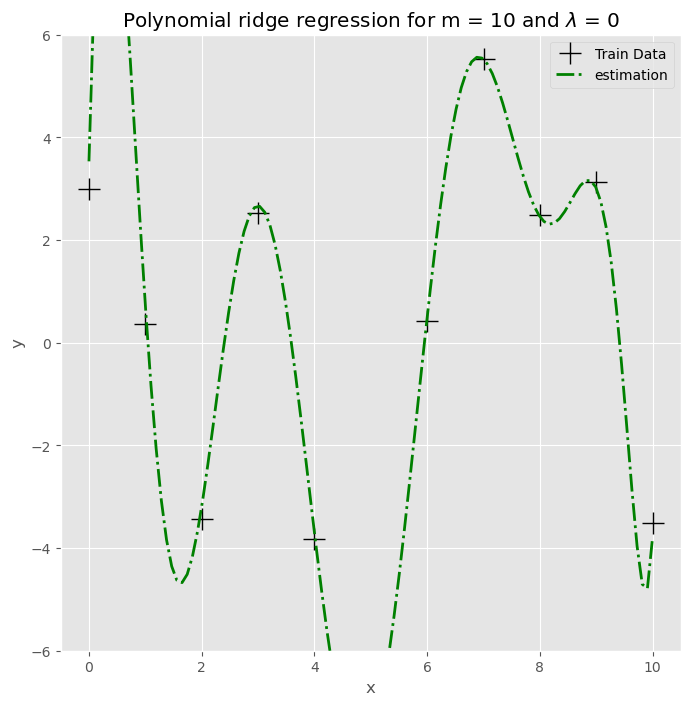

In [28]:
plot_polynomial_regression(10,0)

**C) (6 points)** 

![Figure_3](ridge_poly_regression.png)
On the left hand side of the image above, regression curves for different polynomial degrees m = 1,4,10 are shown and no ridge regression is applied ($\lambda$ = 0). 
On the right hand side of the image above, regression curves for different ridge parameters $\lambda$ = 0,1,10000 are shown for a polynomial of degree m = 10.
Using these plots select the right words to complete the sentences below.

The training data on the right hand side of the image above is best predicted by the fit with degree [1/4/10]. The underlying trend in the data is best predicted by the fit with degree [1/4/10]. Unknown data should therefore be predicted using the fit with degree [1/4/10].

For the largest value of $\lambda$ on the right hand side of the image, the approximation is [a good fit/ overfitting/underfitting]. The best predictions are given for $\lambda$ = [0/1/10000].

For different data sets, the best parameters for m and $\lambda$ for the case presented in the image will [generally result in good predictions/only result in good predictions for similar data/generally result in bad predictions/only result in bad predictions for similar data]. 